Tech Project 2 - Ensemble Methods

Diogo Pessoa


In [1]:
import pandas as pd

In [2]:
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)

In [3]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154567 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   comments_disabled               154567 non-null  bool   
 1   ratings_disabled                154567 non-null  bool   
 2   video_error_or_removed          154567 non-null  bool   
 3   likes_log                       154567 non-null  float64
 4   label                           154567 non-null  float64
 5   dislikes_log                    154567 non-null  float64
 6   comment_log                     154567 non-null  float64
 7   num_tags                        154567 non-null  int64  
 8   desc_len                        154567 non-null  int64  
 9   len_title                       154567 non-null  int64  
 10  country_CA                      154567 non-null  bool   
 11  country_FR                      154567 non-null  bool   
 12  countr

In [4]:
combined_data.head(25)

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,label,dislikes_log,comment_log,num_tags,desc_len,len_title,...,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,...,False,False,False,False,False,False,False,False,False,True
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,...,False,False,False,True,False,False,False,False,False,False
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,...,False,False,False,False,False,False,False,False,False,True
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,...,False,False,False,False,False,False,False,False,False,True
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,...,False,False,False,True,False,False,False,False,False,False
il_pSa5l98w,False,False,False,11.498958,15.624892,8.339501,8.468843,22,449,91,...,False,False,False,False,False,False,False,True,False,False
7MxiQ4v0EnE,False,False,False,11.755699,15.559264,8.872768,8.995165,18,1411,96,...,False,False,False,False,False,False,False,False,True,False
c64I9HNpiOY,False,False,False,11.796140,16.175267,9.083983,9.291736,26,1299,96,...,False,False,False,False,False,False,False,False,True,False
KObFEYCaRx8,False,False,False,6.255750,11.680336,3.988984,3.178054,21,509,97,...,False,False,False,True,False,False,False,False,False,False


## Scaling Dataset features

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 38), (30914, 38), (123653,), (30914,)]


## Voting Regressor to compare different models

* [skelarn Voting Regressor](https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor)
* [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
* [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
* 

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

n_estimators=140 
# Training classifiers
grad_boosting_regressor = GradientBoostingRegressor(random_state=1,)
ada_boosting_regressor = AdaBoostRegressor(random_state=1, n_estimators=n_estimators)
random_forest_regressor = RandomForestRegressor(random_state=1)
bagging_regressor = BaggingRegressor(random_state=1, n_estimators=n_estimators)
linear_regr = LinearRegression()
voting_reg = VotingRegressor(estimators=[('gb', grad_boosting_regressor), ('rf', random_forest_regressor), ('lr', linear_regr), ('ada_b', ada_boosting_regressor), ('bagging_r', bagging_regressor)]) 


BaggingRegressor(n_estimators=140, random_state=1)

In [10]:
# Traing models - GradientBoostingRegressor, RandomForestRegressor, LinearRegression, AdaBoostRegressor, BaggingRegressor, VotingRegressor
grad_boosting_regressor.fit(x_train_Trans, y_train)
ada_boosting_regressor.fit(x_train_Trans, y_train)
bagging_regressor.fit(x_train_Trans, y_train)
random_forest_regressor.fit(x_train_Trans, y_train)
linear_regr.fit(x_train_Trans, y_train)
voting_reg.fit(x_train_Trans, y_train)

LinearRegression()

In [18]:
# gdb_prediction = grad_boosting_regressor.predict(x_test_Trans)
# rf_prediction = random_forest_regressor.predict(x_test_Trans)
# lg_prediction = linear_regr.predict(x_test_Trans)
# ada_b_prediction = ada_boosting_regressor.predict(x_test_Trans)
# bagging_r_prediction = bagging_regressor.predict(x_test_Trans)
voting_reg_prediction = voting_reg.predict(x_test_Trans)

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('mean squared error', 'r2 score', 'explained variance score')
print(f'GradientBoostingRegressor',mean_squared_error(y_test, gdb_prediction),r2_score(y_test, gdb_prediction), explained_variance_score(y_test, gdb_prediction))
print('RandomForestRegressor',mean_squared_error(y_test, rf_prediction),r2_score(y_test, rf_prediction), explained_variance_score(y_test, rf_prediction))
print('LinearRegression',mean_squared_error(y_test, lg_prediction),r2_score(y_test, lg_prediction), explained_variance_score(y_test, lg_prediction))
print('AdaBoostRegressor',mean_squared_error(y_test, ada_b_prediction),r2_score(y_test, ada_b_prediction), explained_variance_score(y_test, ada_b_prediction))
print('BaggingRegressor',mean_squared_error(y_test, bagging_r_prediction),r2_score(y_test, bagging_r_prediction), explained_variance_score(y_test, bagging_r_prediction))
print('VotingRegressor',mean_squared_error(y_test, voting_reg_prediction),r2_score(y_test, voting_reg_prediction), explained_variance_score(y_test, voting_reg_prediction))

mean squared error r2 score explained variance score
GradientBoostingRegressor 0.4712651148298537 0.8577461561568033 0.8577465641598396
RandomForestRegressor 0.2251646577689804 0.9320328684272764 0.9321065460189157
LinearRegression 0.5035593196983447 0.8479979812297007 0.8480011022780577
AdaBoostRegressor 0.8288171687565475 0.7498171954836461 0.7526920840020509
BaggingRegressor 0.22442478596725318 0.9322562026067751 0.9323297800928179
VotingRegressor 0.34316753677343886 0.8964130811892407 0.8966199069012335


In [22]:
# from sklearn.model_selection import GridSearchCV
# 
# voting_reg = VotingRegressor(estimators=[('gb', grad_boosting_regressor), ('rf', random_forest_regressor), ('lr', linear_regr), ('ada_b', ada_boosting_regressor), ('bagging_r', bagging_regressor)])
# 
# grid = GridSearchCV(estimator=voting_reg, param_grid=, cv=5)
# grid = grid.fit(x_train_Trans, y_train)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [49]:
bagging_r_prediction

array([12.67155305, 14.29352128, 10.05272472, ...,  9.92524016,
       12.44956033, 11.80175256])

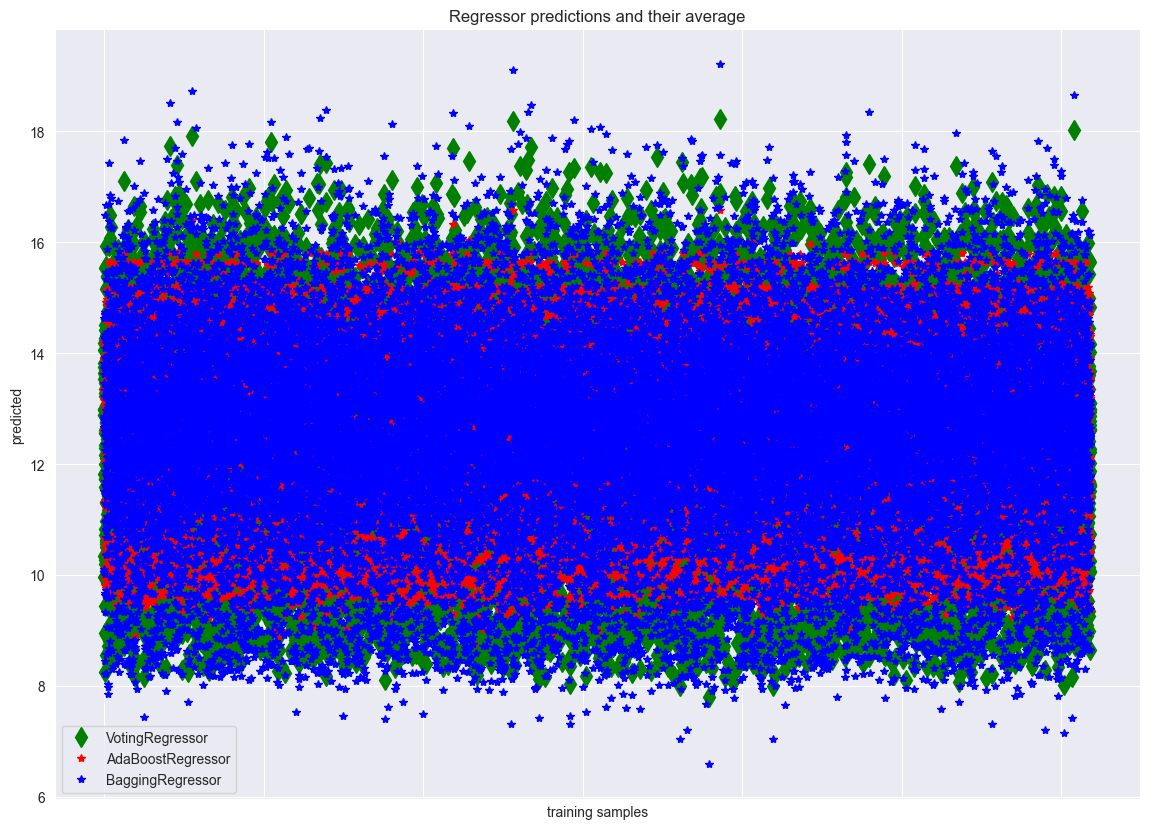

In [46]:
from  matplotlib import pyplot as plt

plt.figure(figsize=(14, 10))
# plt.plot(rf_prediction, "b^", label="RandomForestRegressor")
# plt.plot(lg_prediction, "ys", label="LinearRegression")
# plt.plot(gdb_prediction, "gd", label="GradientBoostingRegressor")
plt.plot(voting_reg_prediction, "gd", ms=10, label="VotingRegressor")
plt.plot(ada_b_prediction, "r*", label="AdaBoostRegressor")
plt.plot(bagging_r_prediction, "b*", label="BaggingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Only tune the max depth of the trees in the RF hyperparameter.
grid = GridSearchCV(estimator=AdaBoostRegressor(), param_grid={'n_estimators':[140],'random_state':[5,20,42]},cv=5)
grid.fit(x_train_Trans, y_train)
grid.best_params_

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()